# <center> COMP 562 : Inroduction to Machine Learning </center>
## <center> <font color='red'>Lecture 5 : Feature Scaling, Logistic Regression </font> </center> 
### <center> Mahmoud Mostapha </center> 
### <center> Department of Computer Science -- UNC Chapel Hill</center>
###  <center> September 10, 2018 </center>

# COMP 562 – Lecture 5

Plan for today

1. Review closed form linear regression, ridge regression
2. Introduce sigmoid function
3. Logistic regression 
4. Geometric view of logistic regression -- separating hyperplanes

$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\loglik}{\log\mathcal{L}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ | }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
$$

# Last time -- Closed Form Solution for Linear Regression

In matrix form, we can rewrite this model as 

$$
\left[\begin{array}{c} { y_1 \\ y_2 \\ \vdots \\ y_N}\end{array}\right]_{\ N \times 1} = \left[\begin{array}{ccccc} 1  & x_{11} & x_{12} & \ldots & x_{1p} \\ 1  & x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots  & \vdots & \vdots & \ldots & \vdots \\ 1  & x_{N1} & x_{N2} & \ldots & x_{Np} \end{array}\right]_{\ N \times p+1} \left[\begin{array}{c} \ { \beta_0 \\ \beta_1 \\ \vdots \\ \beta_P}\end{array}\right]_{\ p+1 \times 1} \ + \left[\begin{array}{c} \ { \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_N}\end{array}\right]_{\ N \times 1}
$$

This can be rewritten more simply as:

$$
\yy = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon}
$$

Once we compute $\beta^{\MLE}$, we can get $(\sigma^2)^\MLE$ in closed form

$$
(\sigma^{2})^\MLE = \frac{1}{N} (\yy -  \mathbf{X} \beta^\MLE)^T(\yy -  \mathbf{X} \beta^\MLE)  = \frac{1}{N} \sum_{i=1}^N \left(y_i - (\beta_0^\MLE + \sum_{j=1}^p x_{i,j} \beta_j^\MLE)\right)^2
$$

# Last time -- Regularization

Ill-posed problems have many solutions

One way to break the ties between different solutions is to add regularization

Ridge regression is adds regularization to the log-likelihood:

$$
\loglik(\beta\given\yy,\xx) =  -\frac{1}{2\sigma^2}\norm{\yy - \mathbf{X} \mathbf{\beta}}^2  \underbrace{-\frac{\lambda}{2}\norm{\beta}^2}_{\textrm{ridge penalty}}+ \textrm{const.}
$$

Using this regularization spreads the weights between correlated predictors 

Setting $\lambda=0$ recovers the linear regression log-likelihood

# Last time -- Closed Form Solution for Ridge Regression

Our closed form solution for ridge regression

$$
\beta^{\MLE} = (\mathbf{X}^T\mathbf{X} + \color{red}{\lambda\sigma^2 \mathbf{I}_N})^{-1}(\mathbf{X}^T\yy)
$$

The only difference between the closed form of linear regression and ridge regression is the addition of the term shown in red.

The bias/intercept coefficient $\beta_0$ is typically not regularized in a linear regression

Updating our closed form solution without regularizing $\beta_0$ will yeild

$$
\beta^{\MLE} = \left(\mathbf{X}^T\mathbf{X} + \color{red}{\lambda\sigma^2 \left[\begin{array}{ccccc} 0  & 0 & 0 & \ldots & 0 \\ 0  & 1 & 0 & \ldots & 0 \\ \vdots  & \vdots & \vdots & \ldots & \vdots \\ 0  & 0 & 0 & \ldots & 1 \end{array}\right]_{\ N \times N}}\right)^{-1}(\mathbf{X}^T\yy)
$$

# Feature Scaling -- Feature Scaling

* Idea: gradient ascent/descentalgorithm tends to work better if the features are on the **same scale** 

<img src="./Images/Scaling.png" align="center"/>

When contours are skewed then learning steps would take longer to converge due to oscillatory behaviour

# Feature Scaling -- Centering

**Center** features by removing the mean

$$
\begin{aligned}
\mu_i &= \frac{1}{N}\sum_{k=1}^N x_{i,k}\\ \\
x_{i,j} &= x_{i,j} - \mu_i
\end{aligned}
$$

This makes each feature's mean equal to 0. Compute the mean first, then subtract it!


# Feature Scaling -- Standardizing


**Standardize** centered features by dividing by the standard deviation

$$
\begin{aligned}
\sigma_i &= \sqrt{ \frac{1}{N-1}\sum_j x_{i,j}^2 }\\ \\
x_{i,j}& = \frac{x_{i,j}}{\sigma_i}
\end{aligned}
$$

Note that standardized features are first centered and then divided by their standard deviation

Transform your data to a distribution that has a mean of 0 and a standard deviation of 1 (z-score)

# Feature Scaling -- Normalizing

Alternatively, **normalize** centered features by dividing by their norm

$$
\begin{aligned}
r_i &= \sqrt{\sum_j x_{i,j}^2 }\\ \\
x_{i,j}& = \frac{x_{i,j}}{r_i}
\end{aligned}
$$

Note that normalized features are first centered and then divided by their norm

Normalization transforms your data into a range between 0 and 1 regardless of the data set size

# Feature Scaling Benefits

1. Centering 
  1. $\beta_0$ is equal to the mean of the target variable 
  2. Feature weights $\beta$ now tell us how much does feature's departure from mean affect the target variable 
2. Standardization
  1. All the features are on the same scale and their effects comparable
  2. Interpretation is easier: $\beta$s tell us how much departure by single standard deviation affects the target variable  
3. Normalization
  1. Scale of features is the same, regardles of the size of the dataset
  2. Hence weights learend on different sized datasets can be compared
  3. However, their combination might be problematic -- certainly we don't trust weights learned on few samples

# Classification

* Tumor: Malignant / Bnign ? -- $y \in \{0,1\}$ 
    * $y$: "Negative Class" (e.g., benign tumor)
    * $y$: "Positive Class" (e.g., malignant tumor)
    

<img src="./Images/LR.png" width="700" align="center"/>

* Threshold classifier output $\hat{y}$ at 0.5:
    * If $\hat{y}$ $\geq$ 0.5, then predict "$y$ = 1"
    * If $\hat{y}$ $<$ 0.5, then predict "$y$ = 0"      
    
**<font color='red'> Q: What would be the problem with using linear regression for a classification task?  </font>**

<img src="./Images/LR2.png" width="1000" align="center"/>

We need to modify our linear regression model to perform the required classification task

Remember: we used linear regression to fit a predictive model of continuous variables:

$$
y\given\xx \sim \Gaussian{\beta_0 + \xx^T\beta}{\sigma^2}
$$

**<font color='red'> Q: Gaussian distribution is not well suited for modelling discrete variables, why? What would you change? </font>**

# Classification -- Bernoulli View

We can model a target variable $y \in \{0,1\}$  using Bernouli distribution

$$
p(y=1\given\theta) = \theta
$$

We note that $\theta$ has to be in range $[0,1]$

We cannot directly take weighted combination of features to obtain $\theta$

We need a way to map $\xx^T\beta \in \mathbb{R}$ to range $[0,1]$

# Sigmoid (Logistic) Function

$$
\sigma(z) = \frac{1}{1 + \exp(-z)}
$$

**<font color='red'> Q: Argue that this function maps real line  to range $[0,1]$?  </font>**

**<font color='red'> Q: When does it achieve $0.5$? </font>**

**<font color='red'>  Q: Where does it achieve $0$? Where does it achieve $1$? </font>**

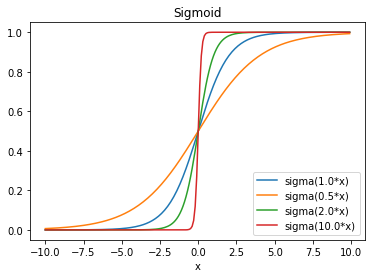

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
x = numpy.arange(-10,10,0.1)
scales = [1.0,0.5,2.0,10.0]
labels = []
for s in scales:
    plt.plot(x,1.0/(1.0 + numpy.exp(-s*x)))
    labels.append('sigma(' + str(s) +'*x)')
plt.xlabel('x')
plt.title('Sigmoid')
plt.legend(labels,loc=4)

# Some Useful Equalities Involving Sigmoid

Definition:

$$
\sigma(z) = \frac{1}{1  + \exp(-z)}
$$

Recognize the alternative way to write it:

$$
\sigma(z) = \frac{\exp z}{1 + \exp z} 
$$

Complement is just flip of the sign in the argument

$$
\sigma(-z) = 1 - \sigma(z) 
$$

Log ratio of probability (log odds) 

$$
\log \frac{\sigma(z)}{\sigma(-z)} = z
$$

# Using Sigmoid to Parameterize Bernoulli

$$
p(y=1|\theta) = \theta
$$

Sigmoid "squashes" the whole real line into range $[0,1]$

Hence we can map weighted features into a parameter $\theta$

$$
\theta = \sigma(\beta_0 + \xx^T\beta) 
$$

and use that $\theta$  in our Bernoulli

$$
p(y=1\given\theta=\sigma(\beta_0 + \xx^T\beta) ) = \sigma(\beta_0 + \xx^T\beta) 
$$



# Logistic Regression -- Binary Classification

In logistic regression we model a binary variable $\color{red}{y \in \{-1,+1\}}$

$$
\begin{aligned}
p({\color{blue}{y=+1}}\given\xx,\beta_0,\beta) &= \sigmoid{{\color{blue}{+}}(\beta_0 + \xx^T\beta)}\\
p({\color{red}{y=-1}}\given\xx,\beta_0,\beta) &= 1 - \sigmoid{-(\beta_0 + \xx^T\beta)} = \sigmoid{{\color{red}{-}}(\beta_0 + \xx^T\beta)} 
\end{aligned}
$$

This is equivalent to

$$
p(y\given\xx,\beta_0,\beta) = 
\sigmoid{{\color{green}{y}}(\beta_0 + \xx^T\beta)} = 
\frac{1}{1 + \myexp{-y(\beta_0 + \xx^T\beta)}}
$$

**<font color='red'> Q: Does above formula work for $y \in \{0,1\}$? </font>**

# Logistic Regression -- Decision Boundary

$$
p(y=1\given\xx,\beta_0,\beta) = 
\sigmoid{(\beta_0 + \xx^T\beta)}= 
\frac{1}{1 + \myexp{-(\beta_0 + \xx^T\beta)}}
$$

$$
\sigma(z) = \frac{1}{1  + \exp(-z)}
$$

* Suppose predict "$y=1$" if 

$$
p(y=1\given\xx,\beta_0,\beta) \geq 0.5 \rightarrow \beta_0 + \xx^T\beta \geq 0 
$$
    
* Then predict "$y=-1$" if 

$$
p(y=1\given\xx,\beta_0,\beta) < 0.5 \rightarrow \beta_0 + \xx^T\beta < 0
$$
    
* Hence, the decision boundary is given by $\beta_0 + \xx^T\beta$ $=$ 0

**<font color='red'> Q: What does this decision boundary equation describe? </font>**

* Assume a 2D problem with two features $x_1$ and $x_2$, then
$$
p(y=1\given\xx,\beta_0,\beta) = 
\sigmoid{(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}= 
\frac{1}{1 + \myexp{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}
$$
$$
\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0 \rightarrow  x_2 = \beta_0 - \frac{\beta_1}{\beta_2} x_1
$$
* In logistic regression, we optimize $\beta$s to find the **optimal decision boundary** between classes
<img src="./Images/decisionboundary.gif" width="900" align="center"/>

# Logistic Regression -- Log-Likelihood

Probability of a single sample is:
$$
p(y\given\xx,\beta_0,\beta) = \frac{1}{1 + \myexp{-y(\beta_0 + \xx^T\beta)}}
$$

Likelihood function is:
$$
\likelihood(\beta_0,\beta\given\yy,\xx) = \prod_i \frac{1}{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)}}
$$

Log-likelihood function is:
$$
\loglik(\beta_0,\beta\given\yy,\xx) = -\sum_i \log\left\{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)} \right\}
$$

Follow the same recipe as before to find $\beta$s that maximize the Log-likelihood function

# Today

1. Review regularized/penalized linear regression
2. Introduce sigmoid and logistic regression
3. Geometric interpretation of logistic regression